## 실습 (멜론차트 파싱)
- 멜론 사이트
    - https://www.melon.com/chart/index.htm

In [182]:
import requests
import pandas as pd

url = 'https://www.melon.com/chart/index.htm'
header = {
    'User-Agent' : 'Mozilla/5.0',
    'Referer' : url
}

response = requests.get(url, headers=header)
result = response.text

In [183]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(result, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   멜론차트&gt;TOP100&gt;멜론
  </title>
  <meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
  <meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
  <meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
  <meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
  <meta content="357952407588971" property="fb:app_id"/>
  <meta content="Melon" property="og:title"/>
  <meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
  <meta content="음악이 필요한 순간, 멜론" property="og:description"/>
  <meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
  <meta content="website" property="og:

In [184]:
#items = soup.select("#frm > div > table > tbody > tr")
items = soup.select("tbody > tr")
# print(type(items))
# print(len(items),'\r\n', items)

In [185]:
# news = li[]
lst = []
for news in items:
    rank = news.select_one('.rank').text.strip()                    # 순위
    title = news.select_one('span > a').text.strip()                # 노래제목
    singer = news.select_one('.ellipsis.rank02 > a').text.strip()   # 가수
    cnt = news.select_one('div > button > span.cnt').text.strip().replace('\t', '')   # 좋아요
    #cnt = news.select_one('span.cnt > .none').text.strip()   # 좋아요

    lst.append([rank, title, singer, cnt])

In [186]:
print(lst)

[['1', 'Supernova', 'aespa', '총건수\r\n0'], ['2', 'How Sweet', 'NewJeans', '총건수\r\n0'], ['3', 'Small girl (feat. 도경수(D.O.))', '이영지', '총건수\r\n0'], ['4', 'Supernatural', 'NewJeans', '총건수\r\n0'], ['5', 'Sticky', 'KISS OF LIFE', '총건수\r\n0'], ['6', '클락션 (Klaxon)', '(여자)아이들', '총건수\r\n0'], ['7', '소나기', '이클립스 (ECLIPSE)', '총건수\r\n0'], ['8', 'Bubble Gum', 'NewJeans', '총건수\r\n0'], ['9', '고민중독', 'QWER', '총건수\r\n0'], ['10', '한 페이지가 될 수 있게', 'DAY6 (데이식스)', '총건수\r\n0'], ['11', 'Armageddon', 'aespa', '총건수\r\n0'], ['12', '나는 아픈 건 딱 질색이니까', '(여자)아이들', '총건수\r\n0'], ['13', 'Magnetic', '아일릿(ILLIT)', '총건수\r\n0'], ['14', 'SPOT! (feat. JENNIE)', '지코 (ZICO)', '총건수\r\n0'], ['15', '해야 (HEYA)', 'IVE (아이브)', '총건수\r\n0'], ['16', '첫 만남은 계획대로 되지 않아', 'TWS (투어스)', '총건수\r\n0'], ['17', 'Welcome to the Show', 'DAY6 (데이식스)', '총건수\r\n0'], ['18', '예뻤어', 'DAY6 (데이식스)', '총건수\r\n0'], ['19', '천상연', '이창섭', '총건수\r\n0'], ['20', '사랑은 늘 도망가', '임영웅', '총건수\r\n0'], ['21', 'Boom Boom Bass', 'RIIZE', '총건수\r\n0'], ['22', '에피소드', '이무진', '총건수

In [187]:
df = pd.DataFrame(lst, columns = ['순위', '제목', '가수', '좋아요'])
df

,순위,제목,가수,좋아요
0,1,Supernova,aespa,총건수\r\n0
1,2,How Sweet,NewJeans,총건수\r\n0
2,3,Small girl (feat. 도경수(D.O.)),이영지,총건수\r\n0
3,4,Supernatural,NewJeans,총건수\r\n0
4,5,Sticky,KISS OF LIFE,총건수\r\n0
...,...,...,...,...
95,96,Lucky Girl Syndrome,아일릿(ILLIT),총건수\r\n0
96,97,EASY,LE SSERAFIM (르세라핌),총건수\r\n0
97,98,Siren,RIIZE,총건수\r\n0
98,99,내가 그댈,하동균,총건수\r\n0


In [188]:
df.to_excel('meoln.xlsx', index=False)

## 셀레니움(Selenium)

In [189]:
%pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from selenium import webdriver

# 크롬 드라이버 생성
driver = webdriver.Chrome()


In [191]:
# naver 사이트 접속
driver.get('https://www.naver.com')

In [192]:
# 현재 페이지url 가져오기
print(driver.current_url)

https://www.naver.com/


In [193]:
# 웹 브라우저 새로고침 하기
driver.refresh()

In [194]:
# google 사이트 접속
driver.get('https://www.google.com')

In [195]:
driver.back()

In [196]:
driver.forward()

In [197]:
driver.maximize_window()

In [198]:
driver.minimize_window()

In [199]:
driver.maximize_window()

In [200]:
driver.current_url

'https://www.google.com/'

In [201]:
driver.close()

In [202]:
# 웹 브라우저 종료된 상태에서 호출 시, 
# InvalidSessionIdException 오류 발생
driver.get('https://www.naver.com')

InvalidSessionIdException: Message: invalid session id
Stacktrace:
	GetHandleVerifier [0x00007FF666BEEEB2+31554]
	(No symbol) [0x00007FF666B67EE9]
	(No symbol) [0x00007FF666A28559]
	(No symbol) [0x00007FF666A69F02]
	(No symbol) [0x00007FF666A6AED1]
	GetHandleVerifier [0x00007FF666EF8B2D+3217341]
	GetHandleVerifier [0x00007FF666F45AF3+3532675]
	GetHandleVerifier [0x00007FF666F3B0F0+3489152]
	GetHandleVerifier [0x00007FF666C9E786+750614]
	(No symbol) [0x00007FF666B7376F]
	(No symbol) [0x00007FF666B6EB24]
	(No symbol) [0x00007FF666B6ECB2]
	(No symbol) [0x00007FF666B5E17F]
	BaseThreadInitThunk [0x00007FFDD54B7374+20]
	RtlUserThreadStart [0x00007FFDD6BFCC91+33]


In [ ]:
driver.get('https://www.naver.com')

### 셀레니움 By 클래스 사용법
- 파일로부터 검색하기

In [6]:
import os
from selenium import webdriver

driver = webdriver.Chrome()
file_path = f"file://{os.path.abspath('sample.html')}"
driver.get(file_path)

In [ ]:
print(os.path.abspath('sample.html'))

h:\dzp\DataCollect\WebCrawling\4일차실습\sample.html


In [17]:
from selenium.webdriver.common.by import By

In [ ]:
# By.ID : id 속성값을 기준으로 요소 찾기
#  id = 'main' 태그를 찾음
element = driver.find_element(By.ID, 'main')
print('Element by ID : ', element.tag_name)

Element by ID :  div


In [ ]:
# By.NAME : name 속성 값을 기준으로 요소 찾기
#  name = 'exampleLink'
element = driver.find_element(By.NAME, 'exampleLink')
print('Element by Name : ', element.get_attribute('href'))

Element by Name :  https://example.com/


In [ ]:
# By.CLASS_NAME : 클래스 이름으로 요소 찾기
element = driver.find_element(By.CLASS_NAME, 'content')

In [ ]:
# By.TAG_NAME : 태그 이름으로 요소 찾기
element = driver.find_element(By.TAG_NAME, 'p')

In [ ]:
# By.LINK_TEXT : 링크 텍스트로 요소 찾기
element = driver.find_element(By.LINK_TEXT, 'Example Link')
print('Element by Link Text : ', element.get_attribute('href'))

Element by Link Text :  https://example.com/


In [ ]:
# By.PARTIAL_LINK_TEXT : 부분 링크 텍스트로 요소 찾기
element = driver.find_element(By.PARTIAL_LINK_TEXT, 'Example')
print('Element by Link Text : ', element.get_attribute('href'))

Element by Link Text :  https://example.com/


#### By.CSS_SELECTOR
- CSS 선택자를 이용하여 요소 찾기

In [ ]:
# p.text : p 태그의 text 클래스 가져오기
elements = driver.find_elements(By.CSS_SELECTOR, 'p.text')
for element in elements:
    print('Element by CSS Selector : ', element.text)

Element by CSS Selector :  First paragraph
Element by CSS Selector :  Second paragraph


### 실습 (멜론 차트 1 ~ 100위 까지) (feat. driver.get)
- https://www.melon.com/chart/index.htm
- 순위, 노래제목, 가수, 앨범, 좋아요

In [ ]:
driver.get('https://www.melon.com/chart/index.htm')

# 웹브라우저를 띄운 상태의 html 소스를 가져옴.
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

In [ ]:
print(soup.prettify())

<html class="narrow-screen" lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   멜론차트&gt;TOP100&gt;멜론
  </title>
  <meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
  <meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
  <meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
  <meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
  <meta content="357952407588971" property="fb:app_id"/>
  <meta content="Melon" property="og:title"/>
  <meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
  <meta content="음악이 필요한 순간, 멜론" property="og:description"/>
  <meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
  <meta content="website" propert

In [ ]:
items = soup.select("tbody > tr")
# print(type(items))
# print(len(items),'\r\n', items)

In [ ]:
lst = []
for news in items:
    rank = news.select_one('.rank').text.strip()                                  # 순위
    title = news.select_one('span > a').text.strip()                              # 노래제목
    singer = news.select_one('.ellipsis.rank02 > a').text.strip()                 # 가수    
    cnt = news.select_one('div > button > span.cnt').text.strip().split()[1]      # 좋아요    
    
    lst.append([rank, title, singer, cnt])

In [ ]:
print(lst)

[['1', 'Supernova', 'aespa', '144,445'], ['2', 'How Sweet', 'NewJeans', '124,221'], ['3', 'Small girl (feat. 도경수(D.O.))', '이영지', '122,224'], ['4', 'Supernatural', 'NewJeans', '67,077'], ['5', 'Sticky', 'KISS OF LIFE', '47,716'], ['6', '클락션 (Klaxon)', '(여자)아이들', '24,613'], ['7', '소나기', '이클립스 (ECLIPSE)', '133,468'], ['8', 'Bubble Gum', 'NewJeans', '98,353'], ['9', '고민중독', 'QWER', '109,017'], ['10', '한 페이지가 될 수 있게', 'DAY6 (데이식스)', '301,804'], ['11', 'Armageddon', 'aespa', '69,701'], ['12', '나는 아픈 건 딱 질색이니까', '(여자)아이들', '150,387'], ['13', 'Magnetic', '아일릿(ILLIT)', '116,807'], ['14', 'SPOT! (feat. JENNIE)', '지코 (ZICO)', '118,234'], ['15', '해야 (HEYA)', 'IVE (아이브)', '76,760'], ['16', '첫 만남은 계획대로 되지 않아', 'TWS (투어스)', '140,252'], ['17', 'Welcome to the Show', 'DAY6 (데이식스)', '85,175'], ['18', '예뻤어', 'DAY6 (데이식스)', '331,585'], ['19', '천상연', '이창섭', '85,537'], ['20', '사랑은 늘 도망가', '임영웅', '217,530'], ['21', 'Boom Boom Bass', 'RIIZE', '50,844'], ['22', '에피소드', '이무진', '95,510'], ['23', 'Hype Boy', 'New

In [ ]:
df = pd.DataFrame(lst, columns = ['순위', '제목', '가수', '좋아요'])
df

,순위,제목,가수,좋아요
0,1,Supernova,aespa,"144,445"
1,2,How Sweet,NewJeans,"124,221"
2,3,Small girl (feat. 도경수(D.O.)),이영지,"122,224"
3,4,Supernatural,NewJeans,"67,077"
4,5,Sticky,KISS OF LIFE,"47,716"
...,...,...,...,...
95,96,Lucky Girl Syndrome,아일릿(ILLIT),"37,027"
96,97,EASY,LE SSERAFIM (르세라핌),"72,995"
97,98,Siren,RIIZE,"60,662"
98,99,내가 그댈,하동균,"12,095"


In [ ]:
df.to_excel('meoln.xlsx', index=False)

### 입력 컨트롤 사용하기 - 네이버 검색하기

#### 예) 네이버 검색 창에 검색어 입력하여 검색하기

In [10]:
import time
# 키보드 입력하기
from selenium.webdriver.common.keys import Keys

In [11]:
# 네이버 사이트로 이동
driver.get('https://www.naver.com')
time.sleep(0.5)

# 검색어 입력 태그 찾기
search = driver.find_element(By.CSS_SELECTOR, "#query")

# 검색어 입력 태그에 커서 위치 시키기 / 버튼 클릭 시 사용
search.click()
time.sleep(0.5)

# 검색어 입력하기
search.send_keys('복숭아')
time.sleep(0.5)

# 엔터키 입력하기
search.send_keys(Keys.ENTER)    # Keys. : 특수키 선택

NameError: name 'By' is not defined

In [12]:
# By 클래스 사용
items = driver.find_elements(By.CSS_SELECTOR, '.product_info > a')
for item in items:
    #print(item.text)
    item.click()
    time.sleep(1)

NameError: name 'By' is not defined

In [ ]:
# 웹브라우저를 띄운 상태의 html 소스를 가져옴.
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/126.0.0.0 safari/537.36" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="always" name="referrer"/>
  <meta content="telephone=no,address=no,email=no" name="format-detection"/>
  <meta content="복숭아 : 네이버 검색" property="og:title"/>
  <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/>
  <meta content="'복숭아'의 네이버 검색 결과입니다." property="og:description"/>
  <meta content="'복숭아'의 네이버 검색 결과입니다." lang="ko" name="description"/>
  <title>
   복숭아 : 네이버 검색
  </title>
  <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/>
  <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/>
  <link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240704.css" rel="sty
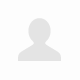
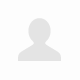

In [ ]:
print(soup.prettify())

In [165]:
#main_pack > section.sc_new.sp_nshop._shopping_root > div:nth-child(1) > div.shop_guide_group._content_root > div:nth-child(1) > div.shop_list_divide._page._ad._calledAdLog > ul > li:nth-child(1)
items = soup.select("ul.list_divide.type_nogap > li")

lst = []
for item in items:
    # rank = news.select_one('div > div > a').text.strip()
    prod = item.select_one('div.product_info > a').text.strip()
    lst.append([prod])

In [166]:
print(lst)

[['딱딱이 복숭아 4kg'], ['복숭아 신비복숭아 납작복숭아 딱딱이 말랑이 거반도 대극천 천도 백도 황도 하우스'], ['복숭아 납작복숭아 신비복숭아 하우스 대극천 거반도 빅숭아 천도 신선 백도 말랑이 딱딱이'], ['꿀당도 딱딱이 복숭아 4kg 특품 백도 털 복숭아'], ['경봉 백도 딱딱이 복숭아 천도 황도 딱 딱복 물복 물복숭아'], ['신비복숭아 복숭아 딱딱이 말랑이 거반도 대극천 천도 백도 황도'], ['농부의 정성을 담은 인생 복숭아 말랑 백도 말랑이 황도 물복 딱복 반납작 납작 복숭아'], ['100% 직접 당도 선별한 고당도 딱딱이복숭아']]


In [167]:
df = pd.DataFrame(lst, columns = ['prod'])
df

,prod
0,딱딱이 복숭아 4kg
1,복숭아 신비복숭아 납작복숭아 딱딱이 말랑이 거반도 대극천 천도 백도 황도 하우스
2,복숭아 납작복숭아 신비복숭아 하우스 대극천 거반도 빅숭아 천도 신선 백도 말랑이 딱딱이
3,꿀당도 딱딱이 복숭아 4kg 특품 백도 털 복숭아
4,경봉 백도 딱딱이 복숭아 천도 황도 딱 딱복 물복 물복숭아
5,신비복숭아 복숭아 딱딱이 말랑이 거반도 대극천 천도 백도 황도
6,농부의 정성을 담은 인생 복숭아 말랑 백도 말랑이 황도 물복 딱복 반납작 납작 복숭아
7,100% 직접 당도 선별한 고당도 딱딱이복숭아


#### 네이버 메인 검색 후, 조회된 페이지에서 재 조회

In [5]:
# 네이버 사이트로 이동
driver.get('https://www.naver.com')
time.sleep(0.5)

# 검색어 입력 태그 찾기
search = driver.find_element(By.CSS_SELECTOR, "#query")

# 검색어 입력 태그에 커서 위치 시키기 / 버튼 클릭 시 사용
search.click()
time.sleep(0.5)

# 검색어 입력하기
search.send_keys('노트북')
time.sleep(0.5)

# 엔터키 입력하기
search.send_keys(Keys.ENTER)    # Keys. : 특수키 선택

NameError: name 'driver' is not defined

In [173]:
# 검색어 입력 태그 찾기
search = driver.find_element(By.CSS_SELECTOR, "#nx_query")

# 검색어 입력 태그에 커서 위치 시키기 / 버튼 클릭 시 사용
search.click()
time.sleep(0.5)

# 검색어 입력하기
search.clear()
search.send_keys('감자')
time.sleep(0.5)

# 엔터키 입력하기
search.send_keys(Keys.ENTER)    # Keys. : 특수키 선택

#### 여러 요소 클릭 시 주의할점
```
elements = driver.find_elements(By.CSS_SELECTOR, 'a')
for element in elements:
    element.click()
```

- 주의) find_elements 함수
    - 일치하는 모든 요소를 찾아 WebElement 객체 리스트를 반환
    - 반복문을 돌면서 클릭 작업을 수행
        - 빠르게 자동으로 수행하는 경우 문제 발생 할 수 있음.
        - time.sleep(1) 함수를 이용하여, 특정 초 동안 대기 후 클릭하는 작업 필요

In [4]:
# By 클래스 사용
items = driver.find_elements(By.CSS_SELECTOR, '.product_info > a')
for item in items:
    #print(item.text)
    item.click()

NameError: name 'driver' is not defined

### NoSuchElementException 발생
- 동적으로 변화하는 웹 페이지의 경우 태그가 로딩되기 전에, 다음 코드가 실행되어 요소를 찾지 못할 때 종종 발생
- 해결책
    - Time 모듈
    ```
    import time
    time.sleep(1)

    import time
    import random
    time.sleep(random.uniform(0.5, 1.5))
    ```
    - implicitly_wait 함수
    ```
    driver.implicitly_wait(10)
    ```
        - driver.implicitly_wait(int)를 이용하여, 페이지 로딩이 완료될 때까지 int(초)만큼 기다리게 하는 것
        - 1번만 선언해 주면, driver 객체가 살아있는 동안 유효함. 다른 페이지로 옮겨도 페이지가 로딩될 때마다 대기
            - 원하는 요소가 이미 로딩이 되었어도 대기해야 함.
    - Explicitly_wait 함수 : WebDriverWait 함수 이용
        - 명시적으로 어떤 조건이 성립할 때까지 대기
        - 즉, 특정 조건이 성립하지 않으면 timeout 시간동안 대기하며, TimeoutException 을 발생시킴
        ```
        from selenium.webdriver.support.ui import WebDriverWait
        from selenium.webdriver.support import expected_conditions as EC

        element = WebDriverWait(driver, 5).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#query'))
        )
        ```
        - until(method, message='') : method를 실행해서 False가 아닐 때까지 대기함

In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
# 키보드 입력하기
from selenium.webdriver.common.keys import Keys

# 크롬 드라이버 생성
driver = webdriver.Chrome()

In [13]:
import time
import random
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [14]:
time.sleep(random.uniform(1, 3))

In [15]:
driver.implicitly_wait(5)

In [19]:
element = WebDriverWait(driver, 5).until(
 EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#nx_query')) 
)

TimeoutException: Message: 


---
### 입력 컨트롤 사용하기 - 로봇으로 인식하는 문제
- 자동화 도구를 사용하는 것을 방지하기 위해 로봇으로 감지할 수 있는 방어 메커니즘을 가지는 웹 사이트들이 존재함.
- 사람이 직접 복사해서 붙여넣기 작업을 하는 것처럼 보이도록 해서 회피할 수 있음
- 사용법 1
    - 순차적 키 입력
        - 여러 개의 키를 순차적으로 입력하고자 할때 사용
        ```
        input_text.send_keys(Keys.CONTROL, 'a')
        input_text.send_keys(Keys.CONTROL, 'c')
        input_text.clear()
        input_text.send_keys(Keys.CONTROL, 'v')
        ```
    - 입력 값 삭제
        ```
        input_text.clear()
        ```
        - 텍스트박스, 텍스트영역 등의 모든 텍스트를 삭제할 때 사용
        - 사용자의 입력을 받는 태그에서만 작동함.
- 사용법 2
    - 클립보드를 이용하여 붙여넣기 방식으로 회피
    - 클립보드 라이브러리 설치
        ```
        pip install pyperclip
        ```
    - 복사, 붙여 넣기
        ```
        target = '복숭아'

        pyperclip.copy(target)
        search.send_keys(Keys.CONTROL + 'v')
        search.send_keys(Keys.ENTER)
        ```

In [20]:
%pip install pyperclip

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pyperclip: filename=pyperclip-1.9.0-py3-none-any.whl size=11019 sha256=51b05b805e50c51262084f94828526b9566372dcfe2bbd8e6120bfaf97c8bf06
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e0\e8\fc\8ab8aa326e33bc066ccd5f3ca9646eab4299881af933f94f09
Successfully built pyperclip
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# 네이버 사이트로 이동
driver.get('https://www.naver.com')
time.sleep(0.5)

# 검색어 입력 태그 찾기
search = driver.find_element(By.CSS_SELECTOR, "#query")

# 검색어 입력 태그에 커서 위치 시키기 / 버튼 클릭 시 사용
search.click()
time.sleep(0.5)

# 검색어 입력하기
search.send_keys('노트북')
time.sleep(0.5)

# 엔터키 입력하기
search.send_keys(Keys.ENTER)    # Keys. : 특수키 선택

In [29]:
import pyperclip

target = '인절미빙수'
pyperclip.copy(target)

search = driver.find_element(By.CSS_SELECTOR, "#nx_query")
search.click()
search.clear()

search.send_keys(Keys.CONTROL, 'v')
search.send_keys(Keys.ENTER)

---
### Select 객체 사용하기
- 선택을 하기 위한 콤보 박스를 쉽게 다루기 위한 Select 객체

```
from selenium.webdriver.support.ui import Select

select = Select(select_tag)
```
    - 옵션 선택 방법
        - 콤보 박스에서 옵션 텍스트로 선택 : 보이는 텍스트로 선택

            ```
            select.select_by_visible_text('DB금융투자')
            ```

        - 콤보 박스에서 옵션 값을 선택 : 문자열 형태로 전달해야 함.

            ```
            select.select_by_value('55')
            ```
            
        - 콤보 박스에서 옵션 인덱스로 선택 : 인덱스는 1부터 시작
        
            ```
            select.select_by_index(2)
            ```

### (실습) 네이버 증권
- 네이버증권 -> 리서티 -> 투자정보리포트 사이트로 이동
- 하단의 '증권사' 콤보박스 찾아서 변경

In [42]:
from selenium.webdriver.support.ui import Select

# 네이버증권 -> 리서티 -> 투자정보리포트 사이트로 이동
driver.get('https://finance.naver.com/research/invest_list.naver')
time.sleep(0.5)

#contentarea_left > form > fieldset > ul > li:nth-child(2) > select
# 하단의 "증권사" 콤보박스 찾기
select_tag = driver.find_element(By.CSS_SELECTOR, "#contentarea_left > form > fieldset > ul > li:nth-child(2) > select")
select_combo = Select(select_tag)

# 콤보박스에서 옵션 테스트로 선택 : 보이는 텍스트로 선택
select_combo.select_by_visible_text('유진투자증권')
time.sleep(1)
# # 콤보박스에서 옵션 값을 선택 : 문자열 형태로 전달해야 함.
# select.select_by_value('79')
# time.sleep(1)
# # 콤보박스에서 옵션 인덱스로 선택 : 인덱스는 1부터 시작
# select.select_by_index(4)

#contentarea_left > form > fieldset > div.btn_search
# 하단의 "검색" 버튼 찾기
search_btn = driver.find_element(By.CSS_SELECTOR, "#contentarea_left > form > fieldset > div.btn_search")
search_btn.click()


In [86]:
#contentarea_left > div.box_type_m > table.type_1 > tbody > tr
#contentarea_left > div.box_type_m > table.type_1 > tbody > tr:nth-child(3) > td:nth-child(1) > a
# dzP
# title = driver.find_elements(By.CSS_SELECTOR, "#contentarea_left > div.box_type_m > table.type_1 > tbody > tr > td:nth-child(1) > a")
# file = driver.find_elements(By.CSS_SELECTOR, "#contentarea_left > div.box_type_m > table.type_1 > tbody > tr > td:nth-child(3) > a")
# date = driver.find_elements(By.CSS_SELECTOR, "#contentarea_left > div.box_type_m > table.type_1 > tbody > tr > td:nth-child(4)")
# cnt = driver.find_elements(By.CSS_SELECTOR, "#contentarea_left > div.box_type_m > table.type_1 > tbody > tr > td:nth-child(5)")
title = driver.find_elements(By.CSS_SELECTOR, "tbody")
file = driver.find_elements(By.CSS_SELECTOR, "#contentarea_left > div.box_type_m > table.type_1 > tbody > tr > td:nth-child(3) > a")
date = driver.find_elements(By.CSS_SELECTOR, ".file+.date")
cnt = driver.find_elements(By.CSS_SELECTOR, ".date+.date")


lst = []
for i in range(len(title)):
    lst.append([title[i].text, file[i].get_attribute('href'), date[i].text, cnt[i].text])

In [87]:
print(lst)

[['케인즈 vs 하이에크', 'https://ssl.pstatic.net/imgstock/upload/research/invest/1590368551329.pdf', '20.05.25', '662'], ['금융권의 디지털 전환 가속화 대비하기', 'https://ssl.pstatic.net/imgstock/upload/research/invest/1587515622560.pdf', '20.04.22', '843'], ['합리적 낙관론으로 중기 뷰를 전환합니다', 'https://ssl.pstatic.net/imgstock/upload/research/invest/1584317939765.pdf', '20.03.16', '972'], ['요동치는 금융시장, 자산시장 대응전략', 'https://ssl.pstatic.net/imgstock/upload/research/invest/1584317907182.pdf', '20.03.16', '738'], ['도대체 인프라인가 소비인가', 'https://ssl.pstatic.net/imgstock/upload/research/invest/1583972938544.pdf', '20.03.12', '1395'], ["'트롤러'만 피해도 평균 이상은 한다", 'https://ssl.pstatic.net/imgstock/upload/research/invest/1574040756566.pdf', '19.11.18', '636'], ['확증 편향 점검과 스타일 전략', 'https://ssl.pstatic.net/imgstock/upload/research/invest/1572398674475.pdf', '19.10.30', '252'], ['2020년 중국이 해야하는 일과 할 수 있는 일', 'https://ssl.pstatic.net/imgstock/upload/research/invest/1571793686959.pdf', '19.10.23', '849'], ['논리, 신호, 기술이 결합한 Rational Analysi

In [88]:
import pandas as pd
df = pd.DataFrame(lst, columns = ['제목', '파일', '작성일', '조회수'])
df

,제목,파일,작성일,조회수
0,케인즈 vs 하이에크,https://ssl.pstatic.net/imgstock/upload/resear...,20.05.25,662
1,금융권의 디지털 전환 가속화 대비하기,https://ssl.pstatic.net/imgstock/upload/resear...,20.04.22,843
2,합리적 낙관론으로 중기 뷰를 전환합니다,https://ssl.pstatic.net/imgstock/upload/resear...,20.03.16,972
3,"요동치는 금융시장, 자산시장 대응전략",https://ssl.pstatic.net/imgstock/upload/resear...,20.03.16,738
4,도대체 인프라인가 소비인가,https://ssl.pstatic.net/imgstock/upload/resear...,20.03.12,1395
5,'트롤러'만 피해도 평균 이상은 한다,https://ssl.pstatic.net/imgstock/upload/resear...,19.11.18,636
6,확증 편향 점검과 스타일 전략,https://ssl.pstatic.net/imgstock/upload/resear...,19.10.30,252
7,2020년 중국이 해야하는 일과 할 수 있는 일,https://ssl.pstatic.net/imgstock/upload/resear...,19.10.23,849
8,"논리, 신호, 기술이 결합한 Rational Analysis",https://ssl.pstatic.net/imgstock/upload/resear...,19.10.15,529
9,혼재된 신호와 스타일 전략,https://ssl.pstatic.net/imgstock/upload/resear...,19.10.02,983


In [84]:
import time
import random
file_links = driver.find_elements(By.CSS_SELECTOR, 'td.file > a')
for link in file_links:
    link.click()
    time.sleep(random.uniform(0.5, 2.5))

KeyboardInterrupt: 

### 스크롤 처리 방법
- 스크롤 처리가 필요한 이유
    - 페이지를 클릭해서 찾지 않고, 더보기나 스크롤을 이용한 보기 형태가 많은
    - 스크롤을 끝까지 내려야 원하는 데이터를 전체 받아올 수 있음
- driver.excute_script() 함수
    - 자바 스크립트를 실행해 주는 함수
    - 현재 스크롤 높이
        - current_height = driver.execute_script('return document.body.scrollHeight')
    - 페이지 끝까지 스크롤
        - driver.execute_script('window.scrollo(0, document.body.scrollHeight)')
        - 현재 스크롤 높이와 페이지 끝까지 스크롤 했을때 높이가 같을 때 까지 스크롤

#### 특정 요소로 스크롤하기

In [43]:
last_height = driver.execute_script('return documtn.body.scrollHeight')
while True:
    driver.execute_script('window.scrollTo(0, docment.body.scrollHeight)')
    time.sleep(random.uniform(1,2))
    current_height = driver.execute_script('return document.body.scrollHeight')
    if last_height == current_height:
        break
    
    last_height = current_height

JavascriptException: Message: javascript error: documtn is not defined
  (Session info: chrome=126.0.6478.183)
Stacktrace:
	GetHandleVerifier [0x00007FF666BEEEB2+31554]
	(No symbol) [0x00007FF666B67EE9]
	(No symbol) [0x00007FF666A2872A]
	(No symbol) [0x00007FF666A2E55E]
	(No symbol) [0x00007FF666A311D8]
	(No symbol) [0x00007FF666ABD69B]
	(No symbol) [0x00007FF666A9D02A]
	(No symbol) [0x00007FF666ABC977]
	(No symbol) [0x00007FF666A9CDD3]
	(No symbol) [0x00007FF666A6A33B]
	(No symbol) [0x00007FF666A6AED1]
	GetHandleVerifier [0x00007FF666EF8B2D+3217341]
	GetHandleVerifier [0x00007FF666F45AF3+3532675]
	GetHandleVerifier [0x00007FF666F3B0F0+3489152]
	GetHandleVerifier [0x00007FF666C9E786+750614]
	(No symbol) [0x00007FF666B7376F]
	(No symbol) [0x00007FF666B6EB24]
	(No symbol) [0x00007FF666B6ECB2]
	(No symbol) [0x00007FF666B5E17F]
	BaseThreadInitThunk [0x00007FFDD54B7374+20]
	RtlUserThreadStart [0x00007FFDD6BFCC91+33]


#### 특정 요소가 로드될 때까지 스크롤하기

In [44]:
# 웹 페이지의 요소가 로드되지 않았을 때 로드 될 때까지 스크롤 할 때 유용
while True:
    try:
        element = WebDriverWait(driver, 10).untill(
            EC.presence_of_element_located(By.ID, 'powerlink-div_tgtLREC'))
        if element:
            break
    except:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(1)      

KeyboardInterrupt: 